## MNIST Digit Classification with Single Layer Deep Learning Network
The MNIST is an Image Processing dataset, which consists a large set of handwritten digit data.  It is one of the most popular datasets among Machine Learning students and Researchers. The current assignment is an attempt to build a single layer Deep Learning Network to recognize handwritten digits using the MNIST data.
URL for the data http://yann.lecun.com/exdb/mnist/

#### Setting the Environment
The assignment is completed with Keras with Tensorflowback-end, tested in both CPU and GPU.

In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
import matplotlib as mpl
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import to_categorical
from keras import backend as K
K.set_image_dim_ordering('tf')

Using TensorFlow backend.


In [2]:
np.random.seed(1983)

#### Load the Data 
The data is loaded from https://s3.amazonaws.com/img-datasets/mnist.npz
It can be later changed to an offline data reading too.

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [4]:
def plot_data(image):
    """
    Plot the sample image
    :param image: numpy ndarry
    """
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    imgplot = ax.imshow(image, cmap=mpl.cm.Greys)
    imgplot.set_interpolation('nearest')
    ax.xaxis.set_ticks_position('top')
    ax.yaxis.set_ticks_position('left')
    plt.show()

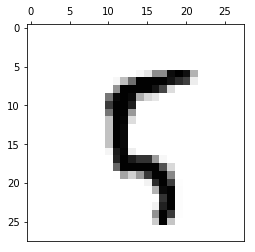

In [5]:
plot_data(X_train[100])

In [6]:
reshape_dim = X_train.shape[1] * X_train.shape[2] #Value for reshapping the data

In [7]:
num_classes = 10

In [8]:
def preprocess(data,labels,flatten_val):
    """
    Function to preprocess the data
    :param data: numpy nd array containing the image data
    :param labels: numpy nd array contaoning the data
    :param flatten_val: int value for flattening the data
    :returns result: dictionary containing preprocessed data and results
    The input images will be normalised - pixel values to the range 0 and 1
    The lanles will be encoded using the one-hot encoding technique.
    """
    data = data.reshape(data.shape[0], flatten_val).astype('float32')
    data = data / 255
    labels = to_categorical(labels,10)
    
    result = {"X": data,"y": labels}
    return result

In [9]:
def basemodel():
    """
    Creating Signle Layer Model
    """
    model = Sequential()
    model.add(Dense(reshape_dim, input_dim=reshape_dim, kernel_initializer='normal', activation='relu'))
    model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

#### Preprocess the Data

In [10]:
train_data = preprocess(X_train,y_train,reshape_dim)
test_data = preprocess(X_test,y_test,reshape_dim)

#### Building the Model
The model is built from the training data only. 20% of the training data is used as validation. So we can use the test data expicitly for eveluating the final model. Also we are perfoming datashuffle before the training happens.

In [11]:
model = basemodel()

model_hist = model.fit(train_data["X"], train_data["y"], \
validation_split=0.2,shuffle = True, \
epochs=10, batch_size=200, verbose=2)

scores = model.evaluate(test_data["X"], test_data["y"], verbose=0)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
3s - loss: 0.3106 - acc: 0.9118 - val_loss: 0.1586 - val_acc: 0.9549
Epoch 2/10
2s - loss: 0.1250 - acc: 0.9640 - val_loss: 0.1176 - val_acc: 0.9653
Epoch 3/10
2s - loss: 0.0826 - acc: 0.9766 - val_loss: 0.0933 - val_acc: 0.9714
Epoch 4/10
3s - loss: 0.0573 - acc: 0.9840 - val_loss: 0.0882 - val_acc: 0.9732
Epoch 5/10
2s - loss: 0.0418 - acc: 0.9887 - val_loss: 0.0765 - val_acc: 0.9770
Epoch 6/10
2s - loss: 0.0300 - acc: 0.9925 - val_loss: 0.0749 - val_acc: 0.9779
Epoch 7/10
3s - loss: 0.0229 - acc: 0.9944 - val_loss: 0.0736 - val_acc: 0.9786
Epoch 8/10
3s - loss: 0.0175 - acc: 0.9958 - val_loss: 0.0689 - val_acc: 0.9796
Epoch 9/10
2s - loss: 0.0117 - acc: 0.9979 - val_loss: 0.0694 - val_acc: 0.9783
Epoch 10/10
2s - loss: 0.0088 - acc: 0.9985 - val_loss: 0.0730 - val_acc: 0.9789


#### Plot the Model Training Performance

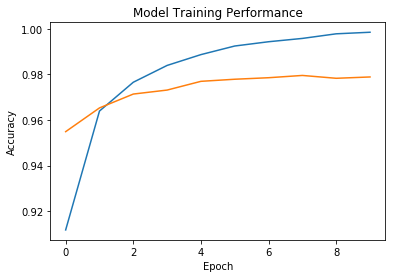

In [12]:
plt.plot(model_hist.history["acc"])
plt.plot(model_hist.history["val_acc"])
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Model Training Performance")

#### Get the Baseline Error

In [13]:
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

Baseline Error: 1.89%
